In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
%matplotlib inline

To visualize a convolutional neural network, we'll draw a graph in code. The main idea here is that not every node is connected. A convolutional neural network is locally connected, not densely connected.

The interesting part here is the window -- which uses a kernel parameter to only connect some inputs to some activations. This is working with a kernel of 3, so each activation will have at most 3 inputs attached.

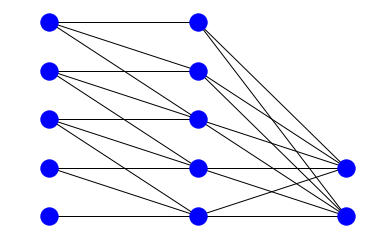

In [2]:
convolve = nx.Graph()
inputs = {i: (0, i) for i in range(0, 5)}
activations = {i+100: (1, i) for i in range(0, 5)}
outputs= {i+1000: (2, i) for i in range(0, 2)}
all = {**inputs, **activations, **outputs}

def window(items, kernel):
    windows = []
    at = 0
    while at < len(items) + kernel:
        windows.append(items[at:at+kernel])
        at = at + 1
    return windows

for i, w in enumerate(window(list(inputs.keys()), 3)): #any given node in hidden layer has only 3 inputs
    for input in w:                                    #while any given output node has all 5 nodes connected
        convolve.add_edge(input, i+100)
for activation in activations:
    for output in outputs:
        convolve.add_edge(activation, output)
nx.draw_networkx_nodes(convolve, all, nodelist=all.keys(), node_color='b')
nx.draw_networkx_edges(convolve, all)
convolution = plt.axis('off')

And now in two dimensions, we'll take a 3x3 patch and show how it is connected.

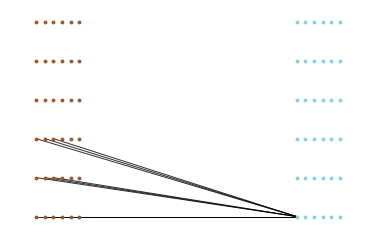

In [3]:
import itertools
import matplotlib.pyplot as plt
size = 6


mnist = nx.Graph()
pixels = {i: (x, y) for i, (x, y) in enumerate(itertools.product(range(0, size), range(0, size)))}
pixel_lookup = {position: i for i, position in pixels.items()}
activations = {i+1000: (x+30, y) for i, (x, y) in enumerate(itertools.product(range(0, size), range(0, size)))}
all = {**pixels, **activations}
for x in range(0, 3):
    for y in range(0, 3):
        pixel = pixel_lookup[(x, y)]
        mnist.add_edge(pixel, 1000)

nx.draw_networkx_nodes(mnist, pixels, nodelist=pixels.keys(), node_color='sienna', node_size=8)
nx.draw_networkx_nodes(mnist, activations, nodelist=activations.keys(), node_color='skyblue', node_size=8)
nx.draw_networkx_edges(mnist, all, alpha=0.8)
twodconvolution = plt.axis('off')

Connect less nodes with less parameters to make it run faster